Here we develop the mapping from radius to phase delay using Bsplines and the relative phase delays associated with the [single pillar simulation](https://github.com/Kovaleski-Research-Lab/single_pillar_sim).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import BSpline

In [2]:
# using three methods here: get_Bsplines() is called from radii_to_phase() and from phase_to_radii()

def get_Bsplines():

    # we're hardcoding the values we got from the LPA sim:
    radii = [0.075, 0.0875, 0.1, 0.1125, 0.125, 0.1375, 0.15, 0.1625, 0.175, 0.1875, 0.2, 0.2125, 0.225, 0.2375, 0.25]
    phase_list = [-3.00185845, -2.89738421, -2.7389328, -2.54946247, -2.26906522, -1.89738599, -1.38868364, -0.78489682, -0.05167712, 0.63232107, 1.22268106, 1.6775137, 2.04169308, 2.34964137, 2.67187105]
    
    radii = np.asarray(radii)
    phase_list = np.asarray(phase_list)
    
    # this is the BSpline interpolating function to complete the mapping from radii <-> phase.
    to_phase = interpolate.splrep(radii, phase_list, s=0, k=3)
    to_radii = interpolate.splrep(phase_list, radii, s=0, k=3)
    
    return to_phase, to_radii

# we have the ability to convert radii to phase and vice versa:
def radii_to_phase(radii):
    
    to_phase, _ = get_Bsplines() 
    
    # uncomment next line if you're starting with torch vals
    #phases = torch.from_numpy(radii)
    
    phases = interpolate.splev(radii, to_phase)
    return phases

def phase_to_radii(phases):
    
    _, to_radii = get_Bsplines()
    
    # uncomment next line if you're starting with torch vals
    #radii = torch.from_numpy(phases)
    
    radii = interpolate.splev(phases, to_radii)
    return radii

In [3]:
# example usage for radii -> phase:

test_radii = np.random.uniform(0.02, 0.28, size=50)

to_phase = radii_to_phase(test_radii)

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_62874/1191724640.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("radii ($\mu m$)")


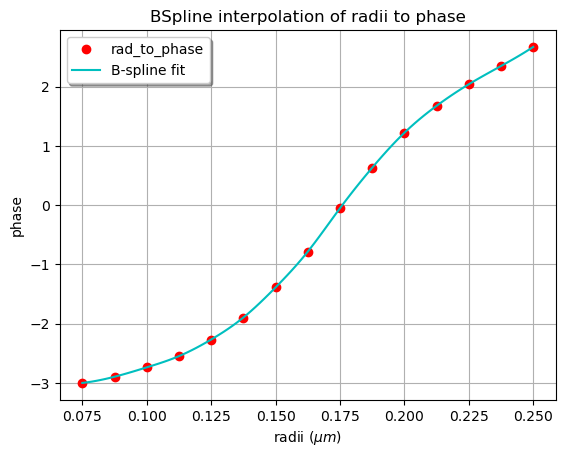

In [4]:
# If you want to see how the interpolation function looks:

radii = [0.075, 0.0875, 0.1, 0.1125, 0.125, 0.1375, 0.15, 0.1625, 0.175, 0.1875, 0.2, 0.2125, 0.225, 0.2375, 0.25]
phase_list = [-3.00185845, -2.89738421, -2.7389328, -2.54946247, -2.26906522, -1.89738599, -1.38868364, -0.78489682, -0.05167712, 0.63232107, 1.22268106, 1.6775137, 2.04169308, 2.34964137, 2.67187105]
   
#tck is the tuple containing the knot points, coefficients, and degree of the B-spline curve.
tck = interpolate.splrep(radii, phase_list, s=0, k=3)
x_new = np.linspace(radii[0], radii[-1], 100)
y_fit = interpolate.BSpline(*tck)(x_new)

tck_ = interpolate.splrep(phase_list, radii, s=0, k=3)
x_new_ = np.linspace(phase_list[0], phase_list[-1], 100)
y_fit_ = interpolate.BSpline(*tck_)(x_new_)

plt.plot(radii,phase_list, 'ro', label="rad_to_phase")
plt.plot(x_new, y_fit, '-c', label="B-spline fit")
plt.title("BSpline interpolation of radii to phase")
plt.legend(loc="best",fancybox=True, shadow=True)
plt.xlabel("radii ($\mu m$)")
plt.ylabel("phase")
plt.grid()

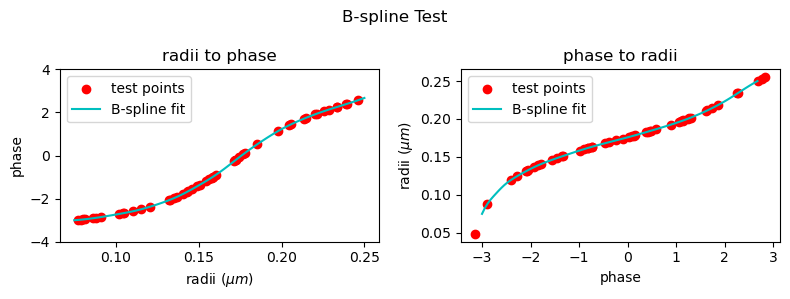

In [6]:
# also, a visualization of testing both functions (rad-> phase and phase-> radii)

min_rad=0.075
max_rad=0.250

min_phi = -np.pi
max_phi = np.pi

test_radii = np.random.uniform(min_rad, max_rad, size=50)
test_phase = np.random.uniform(min_phi, max_phi, size=50)

plt.close("all")

fig, ax = plt.subplots(1,2, figsize=(8,3))

to_phase = []
for radius in test_radii:
    to_phase.append(interpolate.splev(test_radii,tck))
to_phase = np.asarray(to_phase)

to_radii = []
for phase in test_phase:
    to_radii.append(interpolate.splev(test_phase,tck_))
to_radii = np.asarray(to_radii)

fig.suptitle("B-spline Test")
ax[0].scatter(test_radii, to_phase[0], c = 'r', label='test points')
ax[0].plot(x_new, y_fit, '-c', label="B-spline fit")
ax[0].set_xlabel(r"radii ($\mu m$)")
ax[0].set_ylabel("phase")
ax[0].set_title("radii to phase")
#ax[0].set_ylim([-np.pi,np.pi])
ax[0].set_ylim([-4,4])
ax[0].legend()

ax[1].scatter(test_phase, to_radii[0], c = 'r', label='test points')
ax[1].plot(x_new_, y_fit_, '-c', label="B-spline fit")
ax[1].set_xlabel("phase")
ax[1].set_ylabel(r"radii ($\mu m$)")
ax[1].set_title("phase to radii")
#ax[1].set_ylim([min_rad-0.05,max_rad])
ax[1].legend()

fig.tight_layout()